<a href="https://colab.research.google.com/github/JianchaoSun/learning_machine_learning/blob/master/ReducemodelSize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
#import matplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float')/255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

(784,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
59136/60000 [============================>.] - ETA: 0s - loss: 0.5301 - acc: 0.8148
Epoch 00001: val_acc improved from -inf to 0.82640, saving model to Users\jianchaosun⁩\⁨Downloads⁩\savepoint1.h5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5283 - acc: 0.8153 - val_loss: 0.4655 - val_acc: 0.8264
Epoch 2/6
58624/60000 [============================>.] - ETA: 0s - loss: 0.3736 - acc: 0.8652
Epoch 00002: val_acc improved from 0.82640 to 0.86770, saving model to Users\jianchaosun⁩\⁨Downloads⁩\savepoint1.h5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3729 - acc: 0.8653 - val_loss: 0.3736 - val_acc: 0.8677
Epoch 3/6
58880/60000 [============================>.] - ETA: 0s - loss: 0.3314 - acc: 0.8786
Epoch 00003: val_acc did not improve from 0.86770
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3313 - acc: 0.8787 - val_loss: 0.3898 - val_acc: 0.8

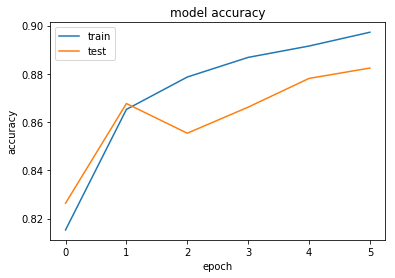

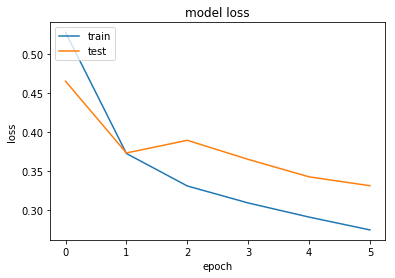

[0.8153333, 0.8652667, 0.8786833, 0.8868167, 0.8915167, 0.8972333]
[0.8264, 0.8677, 0.8554, 0.8662, 0.8781, 0.8824]


In [3]:
from tensorflow.python import keras
import numpy as np
from time import time
network = tf.keras.models.Sequential()
#reduce the # of neuron of each layers to reduce size of model
network.add(tf.keras.layers.Dense(128,activation = 'relu', input_shape = (28*28,)))
network.add(tf.keras.layers.Dense(256,activation = 'relu'))
network.add(tf.keras.layers.Dense(10,activation = 'softmax'))

#add model check point to save best performance, and tensorboard
checkpoint = tf.keras.callbacks.ModelCheckpoint('Users\jianchaosun⁩\⁨Downloads⁩\savepoint\b1.h5', monitor='val_acc', verbose=1, save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs2/{}'.format(time()),write_graph=True, write_grads=True, write_images=True)

network.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(test_images[0].shape)

#network.fit(train_images, train_labels, batch_size = 128, epochs = 3, validation_data = (test_images, test_labels),callbacks=[ early_stop])
history = network.fit(train_images, train_labels, batch_size = 128, epochs = 6, validation_data = (test_images, test_labels),callbacks = [checkpoint,tensorboard])

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['acc'])
print(history.history['val_acc'])